<a href="https://colab.research.google.com/github/maab2198/applied_ds_python/blob/course2/applied_plotting/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [0]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
!cp -r gdrive/'My Drive'/applied_ds/applied_plotting/data ./
!ls 

data  gdrive  sample_data


In [0]:
import matplotlib.pyplot as plt
# import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [0]:
binsize =  400
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

station_locations_by_hash = df[df['hash'] == hashid]

lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()
station_locations_by_hash

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
9994,USC00200032,41.9164,-84.0158,231.6,MI,ADRIAN 2 NNE,NaN,HCN,NaN,-6.951679e+06,4.660898e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10004,USC00200220,42.2875,-83.7611,263.7,MI,ANN ARBOR 1W,NaN,NaN,NaN,-6.890160e+06,4.702162e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10005,USC00200228,42.2417,-83.6933,253.6,MI,ANN ARBOR SE,NaN,NaN,NaN,-6.889586e+06,4.697069e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10006,USC00200230,42.2947,-83.7108,274.3,MI,ANN ARBOR U OF MICH,NaN,HCN,NaN,-6.885235e+06,4.702963e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10023,USC00200842,41.8400,-83.8608,210.3,MI,BLISSFIELD 1NNE,NaN,NaN,NaN,-6.947155e+06,4.652402e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10031,USC00201250,42.0636,-83.4358,191.1,MI,CARLETON 2W,NaN,NaN,NaN,-6.887743e+06,4.677266e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10041,USC00201502,42.3264,-84.0133,274.3,MI,CHELSEA,NaN,NaN,NaN,-6.906637e+06,4.706488e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10053,USC00202308,41.9553,-83.6489,201.2,MI,DUNDEE,NaN,NaN,NaN,-6.917101e+06,4.665223e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10097,USC00203712,42.4344,-83.9858,271.3,MI,HELL,NaN,NaN,NaN,-6.892511e+06,4.718497e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10127,USC00205050,42.1508,-84.0236,294.1,MI,MANCHESTER,NaN,NaN,NaN,-6.926732e+06,4.686962e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...


In [0]:
path = 'data/C2A2_data/BinnedCsvs_d'+str(binsize)+'/'+hashid+".csv"
df = pd.read_csv(path)
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [0]:
merged=pd.merge(station_locations_by_hash,df, how='outer', left_on='ID', right_on='ID')

In [0]:
res_max = df[df['Element'] =='TMAX'].groupby("Date")["Data_Value"].agg(
        TMAX= max,
    )

In [0]:
res_min = df[df['Element'] =='TMIN'].groupby("Date")["Data_Value"].agg(
        TMIN= min,
    )

In [0]:
res = pd.merge(res_max,res_min, how='outer', left_index=True, right_index=True)

In [0]:
res = res.reset_index()
res['Date']= pd.to_datetime(res['Date']) 
res

,Date,TMAX,TMIN
0,2005-01-01,156,-56
1,2005-01-02,139,-56
2,2005-01-03,133,0
3,2005-01-04,39,-39
4,2005-01-05,33,-94
...,...,...,...
4012,2015-12-27,83,-6
4013,2015-12-28,61,-39
4014,2015-12-29,100,-39
4015,2015-12-30,67,-22


In [0]:
res['year'] = pd.DatetimeIndex(res['Date']).year
res

,Date,TMAX,TMIN,year
0,2005-01-01,156,-56,2005
1,2005-01-02,139,-56,2005
2,2005-01-03,133,0,2005
3,2005-01-04,39,-39,2005
4,2005-01-05,33,-94,2005
...,...,...,...,...
4012,2015-12-27,83,-6,2015
4013,2015-12-28,61,-39,2015
4014,2015-12-29,100,-39,2015
4015,2015-12-30,67,-22,2015


In [0]:
import numpy as np
prev_years = res.copy()
res["m_date"] = pd.to_datetime(res["Date"]).dt.strftime('%m-%d')


In [0]:
prev_years = res.groupby("m_date")["TMAX","TMIN"].agg('mean')

In [0]:
prev_years

,TMAX,TMIN
m_date,,
01-01,55.090909,-91.818182
01-02,49.545455,-130.636364
01-03,30.363636,-121.636364
01-04,30.545455,-113.000000
01-05,45.454545,-103.363636
...,...,...
12-27,66.181818,-68.090909
12-28,72.636364,-79.545455
12-29,67.181818,-80.000000


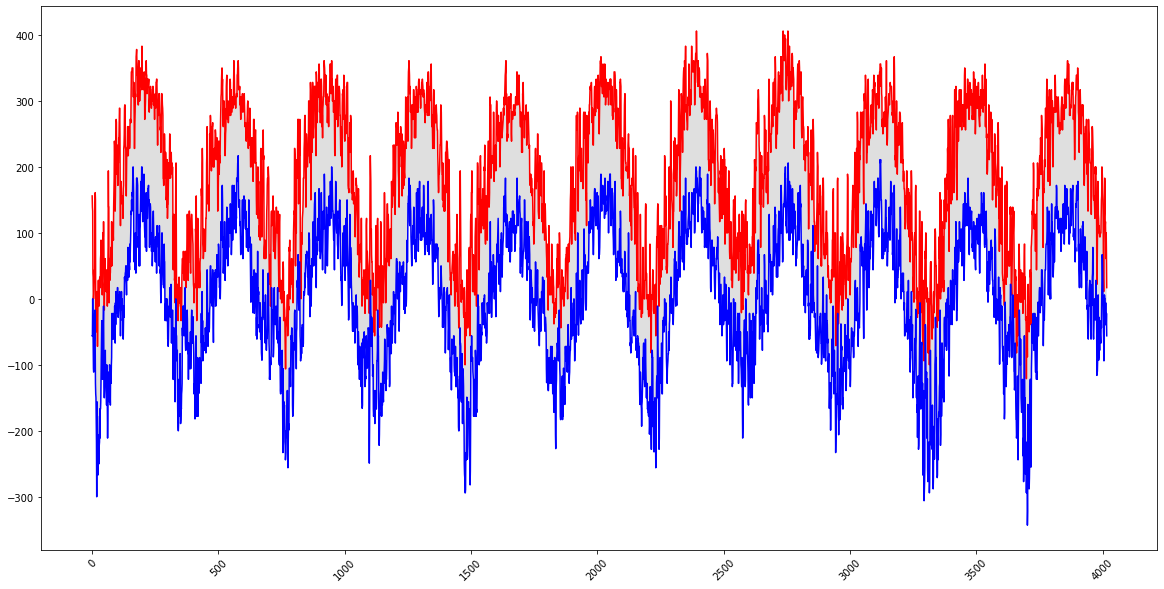

In [0]:
plt.figure(num=None, figsize=(20, 10))
dates = list(res.index) 
max_val = list(res["TMAX"]) 
min_val = list(res["TMIN"])
plt.plot(dates, max_val,'',c='red')
plt.plot(dates,min_val ,'',c="blue")
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.gca().fill_between(dates, 
                       max_val, min_val, 
                       facecolor='grey', 
                       alpha=0.25)

In [0]:
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)

NameError: ignored